## K-Nearest Neighbours Supervised training model -

This supervised training model will be implemented on a Classified dataset.

## 1. Import Libraries -
**Import pandas,seaborn, and the usual libraries.**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1.1 Get the Data
**Reading the Classified_Data csv file into a Pandas dataframe**

In [21]:
filepath = '/content/KNN_Project_Data'
df = pd.read_csv(filepath)

In [22]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# 2.Exploratory Data analysis-

**Using seaborn on the entire dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

[]

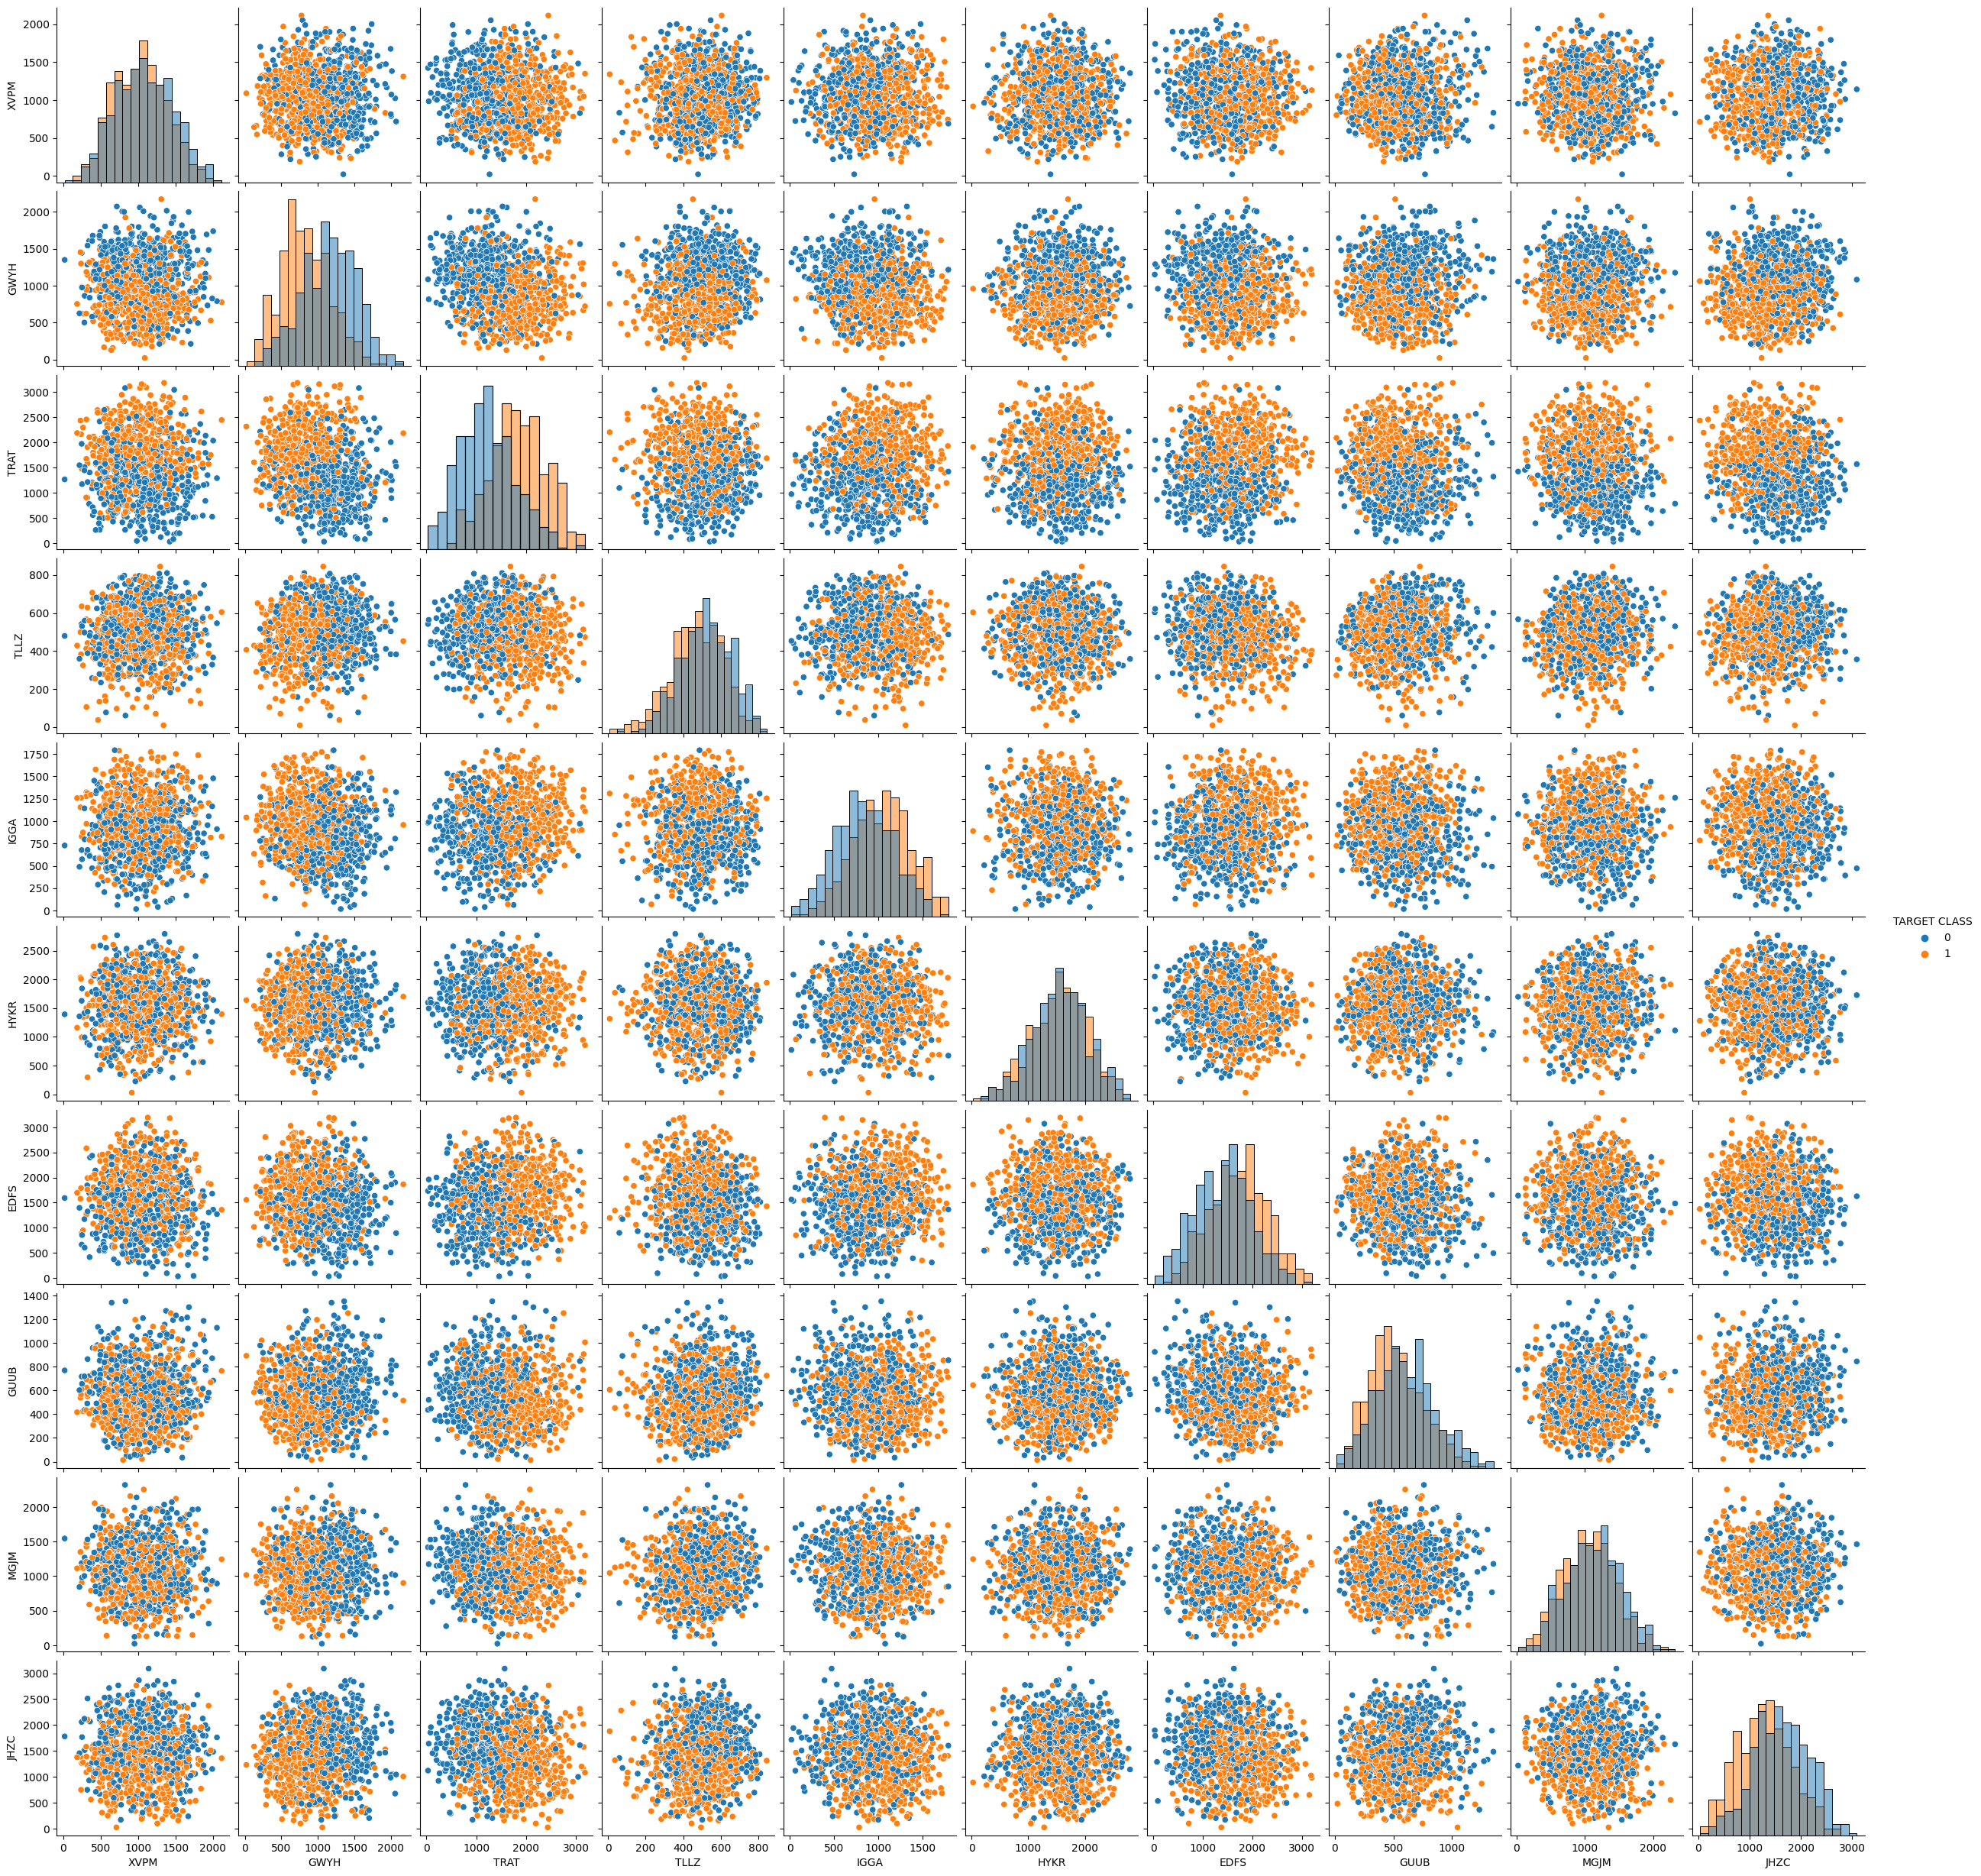

In [23]:
sns.pairplot(df,hue = 'TARGET CLASS',diag_kind = 'hist')
plt.plot(dpi = 200)

## 3.Standardizing the Dataset variables with scikit-learn -

**Importing StandardScaler from Scikit learn.**

In [24]:
from sklearn.preprocessing import StandardScaler

**Creating an instance of StandardScaler() object called scaler.**

In [25]:
scaler = StandardScaler()

**Fitting scaler to the features.**

In [26]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [27]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [28]:
scaled_var = scaler.transform(df.drop('TARGET CLASS',axis = 1))

**Converting the scaled features to a dataframe and checking the head of this dataframe to make sure the scaling was successful.**

In [29]:
transformed_df = pd.DataFrame(scaled_var,columns = ['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'])

In [30]:
transformed_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

## 3.1 Train Test Split

**Using scikit.learn model_selection library to use train_test_split function to split the data into a training set and a testing set.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = transformed_df
y = df['TARGET CLASS']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3.2 Using KNN Classifier algorithm to train model -

**Import KNeighborsClassifier from scikit learn.**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## 4. Predictions and Evaluations
Let's evaluate our KNN model!

**Using the predict method to predict values using your KNN model and X_test.**

In [37]:
predictions = knn.predict(X_test)

**Creating a confusion matrix and classification report for the model**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 41 107]]


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## 4.1 Choosing the right K Value with Elbow method -
Let's go ahead and use the elbow method to pick a good K Value!

**Creating a for loop that trains various KNN models with different k values, and keeping a track of the error_rate for each of these models with a list.**

In [41]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

In [42]:
x_axis = []
for i in range(1,40):
    x_axis.append(i)


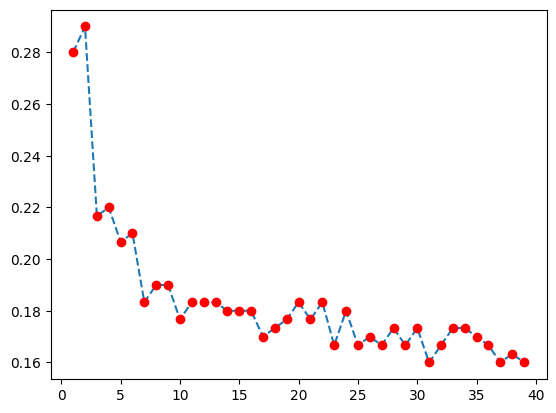

In [43]:
plt.plot(x_axis,error_rate,marker = 'o',linestyle = 'dashed',mfc = 'r',mec = 'r')

## 5.Retraining with new K Value

Selecting value of K = 33 based on the lineplot with a lower error value, and re training the model for KNN classification.

In [44]:
knn = KNeighborsClassifier(n_neighbors=33)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [46]:
prediction = knn.predict(X_test)

In [47]:
confusion_matrix(prediction,y_test)

array([[122,  22],
       [ 30, 126]])

In [48]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       144
           1       0.85      0.81      0.83       156

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

